# Data Processing

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train /= 255
x_test /= 255

# Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# Compiling and fitting the Model

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2027 - accuracy: 0.9388 0s - loss: 0
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0841 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0594 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0474 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9883 ETA: 0s - loss: - 15s 8ms/step - loss: 0.0370 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0251 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.99 - 16s 8ms/step - loss: 0.0228 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 16s 8

# Model Evaluation

In [7]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0055 - accuracy: 0.9982


[0.005520793609321117, 0.9982166886329651]

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9850


[0.06395760178565979, 0.9850000143051147]

3


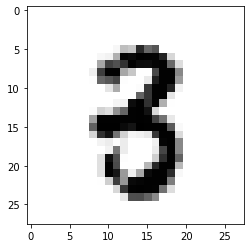

In [9]:
image_index = 2853
from matplotlib import pyplot as plt
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())